In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import skimage.draw
import numpy as np
from tqdm import tqdm
import cv2
import random
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


'''Structure dataset in two folders'''

def create_directory(directory):
    '''
    Creates a new folder in the specified directory if the folder doesn't exist.
    INPUT
        directory: Folder to be created, called as "folder/".
    OUTPUT
        New folder in the current directory.
    '''
    if not os.path.exists(directory):
        os.makedirs(directory)
        
        
label_map = {'Epithelial':1,
             'Lymphocyte':2,
             'Macrophage':4,
             'Neutrophil':3,
            }


# Root directory of the project
ROOT_DIR = os.path.abspath("..")

# Directory of images to run detection on
IMAGES_DEST =  os.path.join(ROOT_DIR, "dataset", "data_processedv0", "images/")
MASKS_DEST = os.path.join(ROOT_DIR, "dataset", "data_processedv0", "masks/")

In [2]:
IMAGES_DEST, MASKS_DEST

('/home/hasib/MoNuSAC-ISBI-2020/dataset/data_processedv0/images/',
 '/home/hasib/MoNuSAC-ISBI-2020/dataset/data_processedv0/masks/')

In [3]:
def pad(im, desired_size = 900):
    "pad image"
    old_size = im.shape[:2] # old_size is in (height, width) format
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format
    im = cv2.resize(im, (new_size[1], new_size[0]))
    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)
    
    return new_im


def read_nuclei(path):
    "read raw data"

    # Load 4-channel image
    img = skimage.io.imread(path)
    
    # input image
    if len(img.shape) > 2:
        img = img[:,:,:3]
    # mask
    else:
        # do nothing
        pass
        
    return img



def save_nuclei(path, img):
    "save image"
    skimage.io.imsave(path, img)
    

(1170, 1090, 3)
uint8


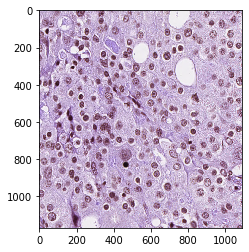

In [4]:
image = read_nuclei("x.tif")
print(image.shape)
print(image.dtype)
plt.imshow(image)

In [5]:
val = image.flatten()
max(val)

# for ground truth mask
# returns multiple values after padding, it should not!
#np.unique(val)

255

(1170, 1090)
float64


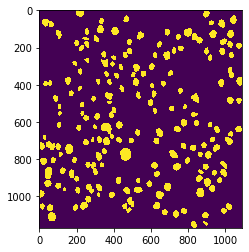

In [6]:
y_ep = read_nuclei("y_ep.tif")
print(y_ep.shape)
print(y_ep.dtype)
plt.imshow(y_ep)

In [7]:
image.shape[:2] == y_ep.shape

True

In [8]:
val = y_ep.flatten()
max(val)

np.unique(val)

array([  0., 255.])

In [9]:
test = np.where(y_ep==255.0, 1.0, y_ep) 
test.shape

(1170, 1090)

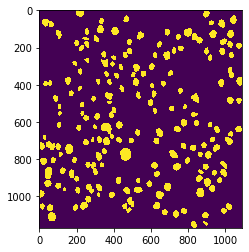

In [10]:
plt.imshow(test)

In [11]:
val = test.flatten()
max(val)

np.unique(val)

array([0., 1.])

In [12]:
test.dtype

dtype('float64')

(1170, 1090)
float64


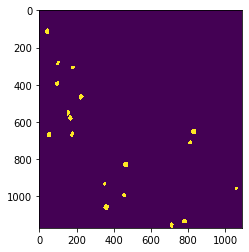

In [13]:
y_ly = read_nuclei("y_ly.tif")
print(y_ly.shape)
print(y_ly.dtype)
plt.imshow(y_ly)

In [14]:
val = y_ly.flatten()
max(val)

np.unique(val)

array([  0., 255.])

In [15]:
test2 = np.where(y_ly==255.0, 2.0, y_ly) 
test2.shape

(1170, 1090)

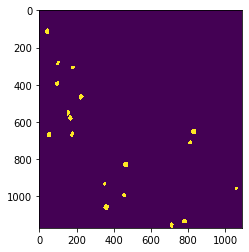

In [16]:
plt.imshow(test2)

In [17]:
val = test2.flatten()
max(val)

np.unique(val)

array([0., 2.])

In [18]:
test2.dtype

dtype('float64')

In [19]:
# overlay two masks

mask = np.maximum(test, test2)
mask.shape

(1170, 1090)

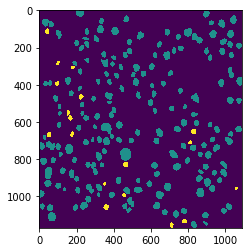

In [20]:
plt.imshow(mask)

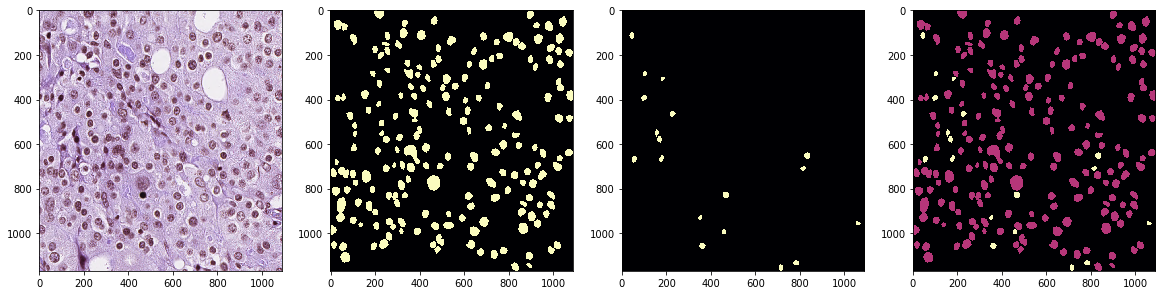

In [21]:
f, axarr = plt.subplots(1,4, figsize=(20,20))

map_name = 'magma'

axarr[0].imshow(image, cmap=map_name)
axarr[1].imshow(test, cmap=map_name)
axarr[2].imshow(test2, cmap=map_name)
axarr[3].imshow(mask, cmap=map_name)

In [22]:
np.unique(mask)

array([0., 1., 2.])

In [23]:
#def process(img):
#    plt.figure(figsize=(8,8))
#    plt.imshow(img)
    
#images = [image, mask]
#for file in images:
#    process(file)

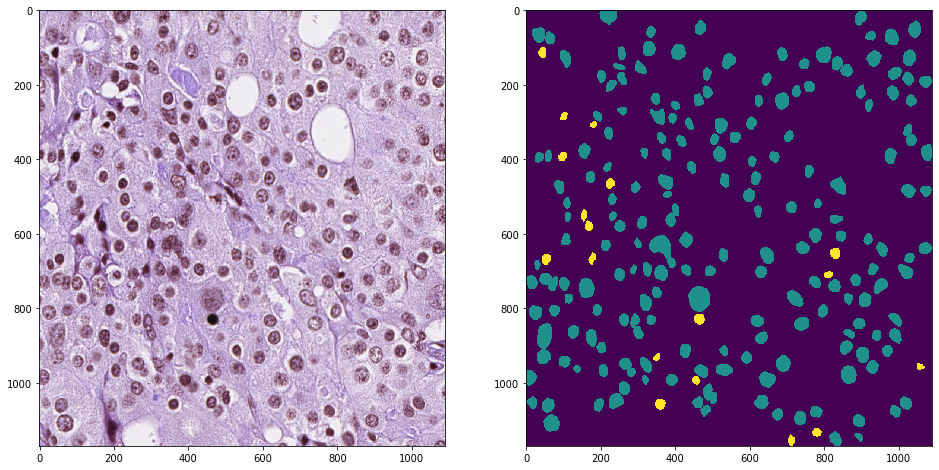

In [24]:
f, axarr = plt.subplots(1,2, figsize=(16,16))

axarr[0].imshow(image)
axarr[1].imshow(mask)

## Make patches

In [3]:
#img = read_nuclei("a.png")
#gt = read_nuclei("a_mask.png")

#print(img.shape)
#print(img.dtype)

#print(gt.shape)
#print(gt.dtype)

Index:  153
(123, 254, 3) (123, 254)
Ground truth classes:  [0 2 3 4]


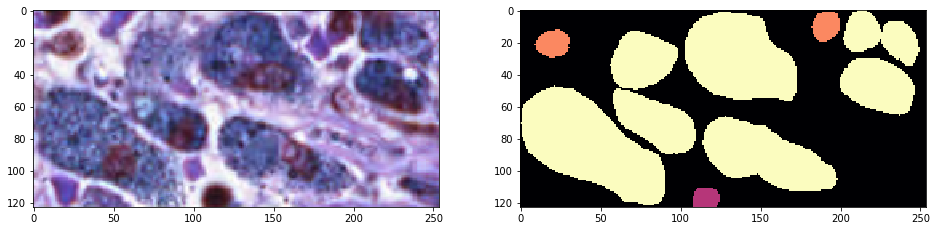

In [9]:
# Load a random image from the images folder
image_fns = sorted(next(os.walk(IMAGES_DEST))[2])
gt_fns = sorted(next(os.walk(MASKS_DEST))[2])


idx = random.randrange(len(image_fns))
print("Index: ", idx)


image = skimage.io.imread(os.path.join(IMAGES_DEST, image_fns[idx]))
gt = skimage.io.imread(os.path.join(MASKS_DEST, gt_fns[idx]))

assert image.shape[:2] == gt.shape, "Wrong image or ground truth!"
assert image.dtype == gt.dtype, "Wrong data types!"

print(image.shape, gt.shape)

val1 = gt.flatten()
print("Ground truth classes: ", np.unique(val1))

f, axarr = plt.subplots(1,2, figsize=(16,16))

map_name = 'magma'

# idx = 154 all classes
axarr[0].imshow(image, cmap=map_name)
axarr[1].imshow(gt, cmap=map_name)

In [7]:
# Check if images and gt match
image_fns = sorted(next(os.walk(IMAGES_DEST))[2])
gt_fns = sorted(next(os.walk(MASKS_DEST))[2])

fc = 0
for x,y in tqdm(zip(image_fns, gt_fns)):
    image = skimage.io.imread(os.path.join(IMAGES_DEST, x))
    gt = skimage.io.imread(os.path.join(MASKS_DEST, y))
    #print(image.shape[:2], gt.shape)
    
    if image.shape[:2] == gt.shape:
        #print(True)
        pass
    else:
        fc+=1
        print(False)
        
print("False count :", fc)

209it [00:06, 31.36it/s]

False count : 0
